In [5]:
"""
calcule la reflectance et transmittance du systeme
n0(ambiant)/n1/n2...n1/n2/n3(substrat)/n0(ambiant) 
reste a faire: ne marche pas pour des n complexes mais devrait
"""

'\ncalcule la reflectance et transmittance du systeme\nn0(ambiant)/n1/n2...n1/n2/n3(substrat)/n0(ambiant) \nreste a faire: ne marche pas pour des n complexes mais devrait\n'

In [6]:
import numpy as np
import filtre_et_miroir as flt                                                                    
import matplotlib.pyplot as plt

In [7]:
longeurondetemp = 800e-9# longeur d'onde avec Max  de réf.
theta0 = 0*np.pi/180  #angle d'incidence
pol=1  #1=s  2=p
n0=1.0   #milieu ambiant
n1=1.5+0.0*1j #couche 1
n2=1.7+.0*1j  #couche 2
n3=1.5  #substrat

#epaisseur du bi-couche (empilement quart-d'onde)
d1=longeurondetemp/(4*n1)
d2=d1*n1/n2

N=20# Nombre de bi-couches

longeurondemin=400e-9
longeurondemax=1000e-9
Np=200# Nombre de point
deltalongeuronde=(longeurondemax-longeurondemin)/Np
longeuronde=longeurondemin

In [8]:
x = np.zeros(shape=(Np, 1))
y1 = np.zeros(shape=(Np, 1))
y2 = np.zeros(shape=(Np, 1))
y3 = np.zeros(shape=(Np, 1))

j=0
while longeuronde<=longeurondemax:

    #bi-couche    
    P1=flt.P(n1,d1,n0,theta0,longeuronde)
    P2=flt.P(n2,d2,n0,theta0,longeuronde)
    T1=flt.T(pol,n1,n2,n0,theta0)
    T2=flt.T(pol,n2,n1,n0,theta0)
    
    C=P1@T1@P2@T2 #cellule unitaire
    #print(C)

    #couplage ambiant et substrat
    T01=flt.T(pol,n0,n1,n0,theta0)
    T2S=flt.T(pol,n2,n3,n0,theta0)
    TS0=flt.T(pol,n3,n0,n0,theta0)

    #derniere bi-couche (pour interface n2/n3)
    D=P1@T1@P2@T2S
    #print(D)
    #substrat fini
    #S=T01*C**(N-1)*D*TS0

    #substrat semi-infini
    S=T01@(np.linalg.matrix_power(C, (N-1)))@D
    
    t=(S[0,0])**(-1)
    r=S[1,0]/S[0,0]

    x[j]=longeuronde*1e9
    y1[j]=np.linalg.norm(t)**2*np.real(n3*flt.cos_theta_i(n3,n0,theta0))/np.real(n0*np.cos(theta0)) #ajuste pour flux Poyinting dans substrat
    y2[j]=np.linalg.norm(r)**2
    longeuronde*1e9
    np.linalg.norm(r)**2
    y3[j]=y1[j]+y2[j]

    longeuronde=longeuronde+deltalongeuronde
    j=j+1

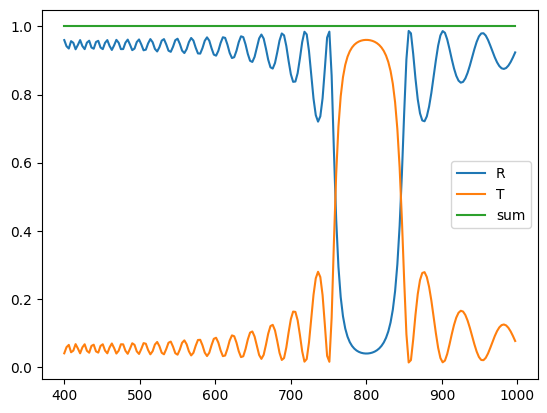

In [9]:
plt.plot(x,y1, label="R")
plt.plot(x,y2, label="T")
plt.plot(x,y3, label="sum")
plt.legend()